In [1]:
"""
Copyright 2021 Huawei Technologies Co., Ltd

CREATED:  2022-10-04 13:12:13
MODIFIED: 2023-01-11 15:48:45
"""

# -*- coding:utf-8 -*-
import sys
import cv2
from PIL import Image
sys.path.append('../../Common/acllite')
from acllite_model import AclLiteModel
from acllite_resource import AclLiteResource
from src.model import preprocessing, construct_image_info, get_sizes
from src.postprocess import post_process



In [2]:
img_path = "../../Common/data/dog.jpg"

model_path = "./model/yolov3_caffe_416_no_csc.om"

acl_resource = AclLiteResource()
acl_resource.init()

model = AclLiteModel(model_path, 0)

init resource stage:
Init resource success
Init model resource start...
[AclLiteModel] create model output dataset:
malloc output 0, size 24576
malloc output 1, size 32
Create model output dataset success
Init model resource success


In [3]:
get_sizes(model._model_desc)

model input size 2
input  0
model input dims ({'name': 'data', 'dimCount': 4, 'dims': [1, 416, 416, 3]}, 0)
model input datatype 4
input  1
model input dims ({'name': 'img_info', 'dimCount': 2, 'dims': [1, 4]}, 0)
model input datatype 0
model output size 2
output  0
model output dims ({'name': 'detection_out3:0:box_out', 'dimCount': 2, 'dims': [1, 6144]}, 0)
model output datatype 0
output  1
model output dims ({'name': 'detection_out3:1:box_out_num', 'dimCount': 2, 'dims': [1, 8]}, 0)
model output datatype 3
[Model] class Model init resource stage success


In [4]:
img_org_bgr = cv2.imread(img_path)

data = preprocessing(img_org_bgr, model._model_desc,model_name="yolov3")

%timeit -n 10 -r 3

result_list = model.execute([data, construct_image_info()])

image_output = post_process(result_list, cv2.imread(img_path), img_path)

post process
 bicycle: class  1, box  111  127  576  430, score  0.994141
 truck: class  7, box  471  87  693  165, score  0.962891
 dog: class  16, box  121  225  322  541, score  0.998047


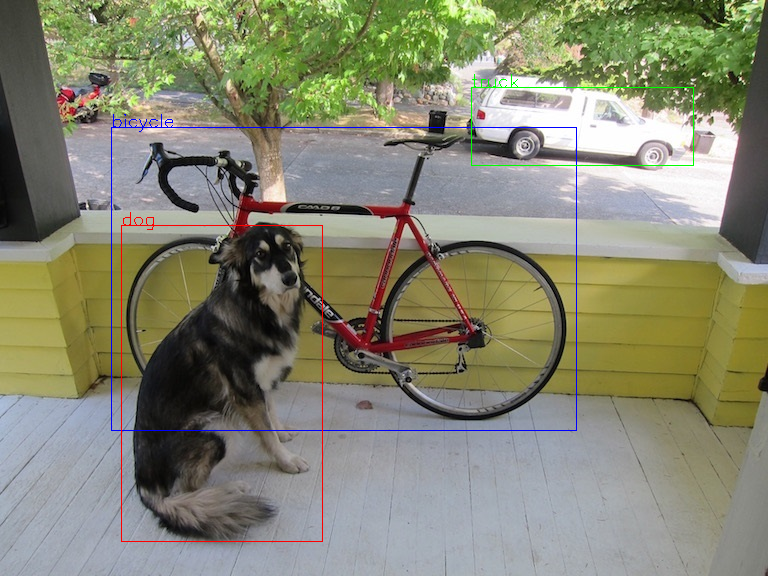

In [5]:
image_output = image_output[:,:,::-1]
img = Image.fromarray(image_output, 'RGB')
img.show()